<a href="https://colab.research.google.com/github/RakshithSuresh/ML-Projects/blob/main/Anomaly_detection(MK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("Synthetic_Patient_Data.csv", parse_dates=["timestamp"])
df

,patient_id,timestamp,heart_rate,blood_pressure_sys,blood_pressure_dia,oxygen_sat
0,PID00001,2025-04-10 09:00:00,73.117387,98.346644,57.696796,95.676400
1,PID00002,2025-03-22 02:00:00,86.931129,130.303128,98.808035,97.546734
2,PID00003,2025-04-27 18:00:00,85.215154,127.292529,80.610286,94.496314
3,PID00004,2025-03-29 13:00:00,84.189149,115.120516,63.775347,97.058189
4,PID00005,2025-02-05 01:00:00,70.403432,144.297199,70.862066,99.378586
...,...,...,...,...,...,...
995,PID00996,2025-02-24 03:00:00,75.156822,79.864730,66.632148,94.313604
996,PID00997,2025-01-29 22:00:00,94.002684,127.383592,78.256359,98.435421
997,PID00998,2025-03-30 03:00:00,85.230566,105.073725,73.228861,99.536271
998,PID00999,2025-04-11 07:00:00,91.435415,113.286042,73.260786,98.555335


In [31]:
df.describe()

,timestamp,heart_rate,blood_pressure_sys,blood_pressure_dia,oxygen_sat
count,1000,990.000000,990.000000,990.000000,990.000000
mean,2025-03-02 21:58:19.200000,76.375520,119.858234,80.222525,96.914693
min,2025-01-01 10:00:00,30.000000,66.917134,46.524494,71.000000
25%,2025-01-29 20:00:00,68.435611,108.359735,72.986958,95.585952
50%,2025-03-03 15:30:00,74.994165,119.470998,79.865582,96.946117
75%,2025-04-03 03:00:00,81.912324,129.978139,87.046164,98.318749
max,2025-05-05 23:00:00,234.000000,214.000000,135.000000,103.186859
std,NaN,17.194339,17.278340,10.981049,2.296392


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          1000 non-null   object        
 1   timestamp           1000 non-null   datetime64[ns]
 2   heart_rate          990 non-null    float64       
 3   blood_pressure_sys  990 non-null    float64       
 4   blood_pressure_dia  990 non-null    float64       
 5   oxygen_sat          990 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 47.0+ KB


In [33]:
df.shape

(1000, 6)

In [34]:
df.isnull().sum()

,0
patient_id,0
timestamp,0
heart_rate,10
blood_pressure_sys,10
blood_pressure_dia,10
oxygen_sat,10


In [35]:
df.dropna(subset=['heart_rate', 'blood_pressure_sys', 'blood_pressure_dia', 'oxygen_sat'], inplace=True)


In [36]:
df.shape

(960, 6)

In [37]:
# Basic range checks
def range_check(df):
    issues = []
    if (df['heart_rate'] < 30).any() or (df['heart_rate'] > 200).any():
        issues.append("Heart rate out of expected range (30-200 bpm).")
    if (df['blood_pressure_sys'] < 80).any() or (df['blood_pressure_sys'] > 200).any():
        issues.append("Systolic BP out of range (80-200 mmHg).")
    if (df['blood_pressure_dia'] < 50).any() or (df['blood_pressure_dia'] > 130).any():
        issues.append("Diastolic BP out of range (50-130 mmHg).")
    if (df['oxygen_sat'] < 85).any() or (df['oxygen_sat'] > 100).any():
        issues.append("Oxygen saturation out of range (85-100%).")
    return issues

print("\nValidation Issues:\n", range_check(df))


Validation Issues:
 ['Heart rate out of expected range (30-200 bpm).', 'Systolic BP out of range (80-200 mmHg).', 'Diastolic BP out of range (50-130 mmHg).', 'Oxygen saturation out of range (85-100%).']


In [38]:
from scipy.stats import zscore

# Compute z-scores
df_z = df[['heart_rate', 'blood_pressure_sys', 'blood_pressure_dia', 'oxygen_sat']].apply(zscore)

# Flag anomalies
anomalies = (np.abs(df_z) > 3)
df['anomaly'] = anomalies.any(axis=1)

# View flagged records
anomaly_df = df[df['anomaly']]
print(f"\nNumber of anomalies detected: {len(anomaly_df)}")



Number of anomalies detected: 32


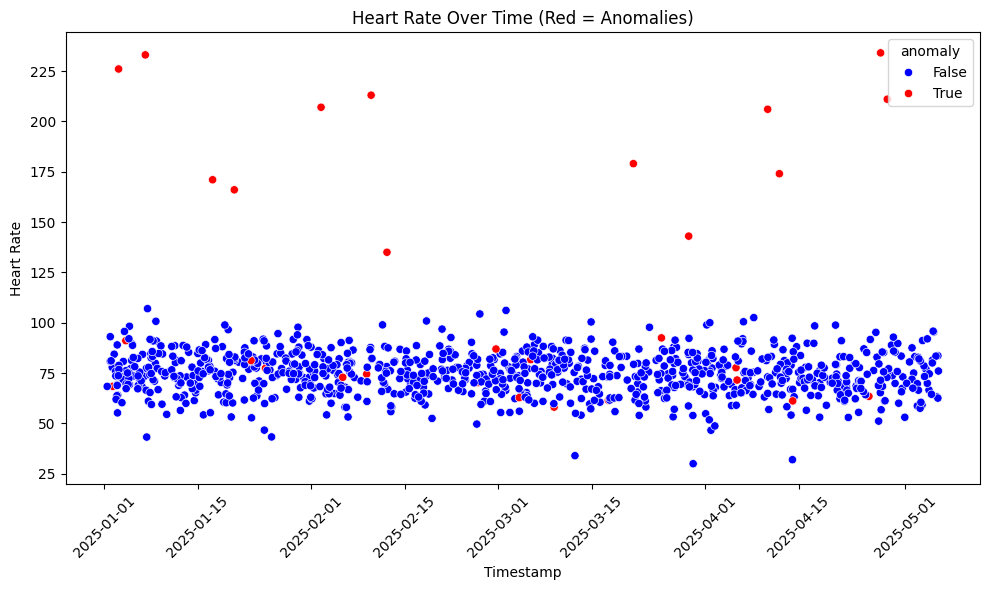

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heart rate with anomalies highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='timestamp', y='heart_rate', hue='anomaly', palette={False: 'blue', True: 'red'})
plt.title("Heart Rate Over Time (Red = Anomalies)")
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
print("Missing values after cleaning:\n", df.isnull().sum())
print("Anomalies by vital sign:\n", (np.abs(df_z) > 3).sum())


Missing values after cleaning:
 patient_id            0
timestamp             0
heart_rate            0
blood_pressure_sys    0
blood_pressure_dia    0
oxygen_sat            0
anomaly               0
iso_anomaly           0
dtype: int64
Anomalies by vital sign:
 heart_rate            13
blood_pressure_sys     7
blood_pressure_dia     8
oxygen_sat             4
dtype: int64


In [48]:
df_z

,heart_rate,blood_pressure_sys,blood_pressure_dia,oxygen_sat
0,-0.184312,-1.252785,-2.038048,-0.537154
1,0.611170,0.607019,1.696955,0.280151
2,0.512353,0.431808,0.043669,-1.052832
3,0.453269,-0.276579,-1.485805,0.066666
4,-0.340599,1.421446,-0.841968,1.080641
...,...,...,...,...
995,-0.066869,-2.328395,-1.226261,-1.132674
996,1.018394,0.437107,-0.170188,0.668493
997,0.513241,-0.861282,-0.626942,1.149547
998,0.870555,-0.383342,-0.624042,0.720894


In [49]:
from sklearn.ensemble import IsolationForest

# Drop rows with NaNs to use Isolation Forest
iso_df = df.dropna(subset=['heart_rate', 'blood_pressure_sys', 'blood_pressure_dia', 'oxygen_sat']).copy()

# Select numeric columns
X = iso_df[['heart_rate', 'blood_pressure_sys', 'blood_pressure_dia', 'oxygen_sat']]

# Fit Isolation Forest model
iso_model = IsolationForest(contamination=0.03, random_state=42)
iso_df['iso_anomaly'] = iso_model.fit_predict(X)

# Add results back to original df
df['iso_anomaly'] = np.nan
df.loc[iso_df.index, 'iso_anomaly'] = iso_df['iso_anomaly']

# View Isolation Forest anomalies
iso_anomalies = df[df['iso_anomaly'] == -1]
print(f"\nIsolation Forest detected {len(iso_anomalies)} anomalies.")



Isolation Forest detected 29 anomalies.


In [50]:
df.loc[(df['anomaly']==True) & (df['iso_anomaly']== -1)]

,patient_id,timestamp,heart_rate,blood_pressure_sys,blood_pressure_dia,oxygen_sat,anomaly,iso_anomaly
16,PID00017,2025-01-03 03:00:00,226.000000,116.549620,94.000000,96.314483,True,-1.0
27,PID00028,2025-03-21 06:00:00,179.000000,101.248897,68.635501,99.681088,True,-1.0
51,PID00052,2025-04-27 07:00:00,234.000000,101.672894,62.709008,97.153011,True,-1.0
103,PID00104,2025-02-02 11:00:00,207.000000,114.351501,75.979185,95.796037,True,-1.0
209,PID00210,2025-04-10 09:00:00,206.000000,137.876068,56.739363,95.517393,True,-1.0
228,PID00229,2025-01-17 05:00:00,171.000000,110.260344,75.150456,100.691291,True,-1.0
258,PID00259,2025-03-03 12:00:00,81.855897,136.235308,135.000000,95.897239,True,-1.0
303,PID00304,2025-01-04 05:00:00,91.095207,214.000000,100.422578,98.209847,True,-1.0
312,PID00313,2025-03-09 09:00:00,58.114948,95.215511,85.925337,85.000000,True,-1.0
324,PID00325,2025-04-05 15:00:00,77.678436,213.000000,75.905774,97.108855,True,-1.0


In [52]:
def classify_anomaly(row):
    if row['anomaly'] and row['iso_anomaly'] == -1:
        return 'Both'
    elif row['anomaly']:
        return 'Z-Score Only'
    elif row['iso_anomaly'] == -1:
        return 'Isolation Forest Only'
    else:
        return 'None'

df['anomaly_type'] = df.apply(classify_anomaly, axis=1)

# Count by anomaly type
print(df['anomaly_type'].value_counts())


anomaly_type
None                     922
Both                      23
Z-Score Only               9
Isolation Forest Only      6
Name: count, dtype: int64


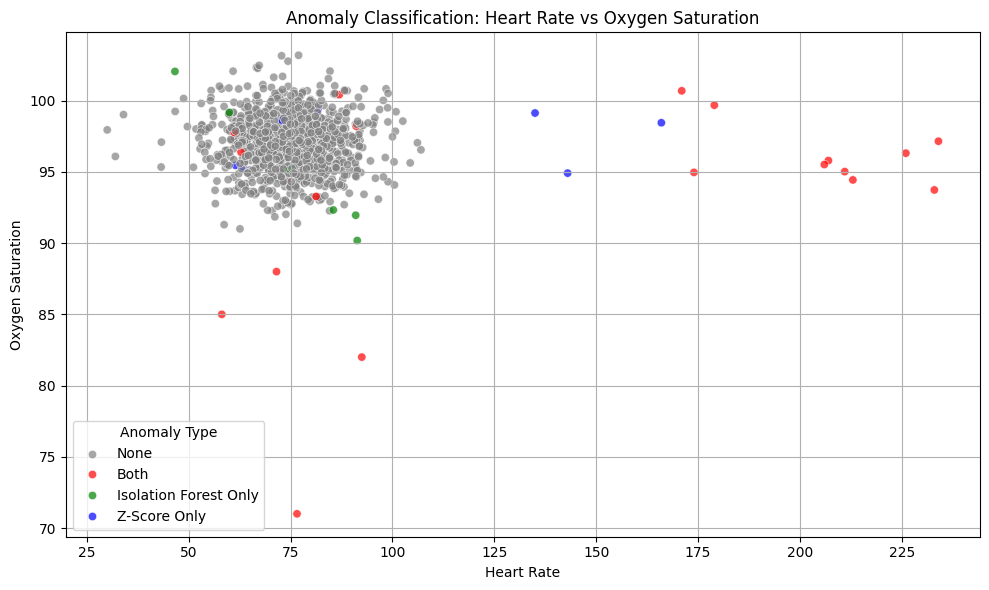

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='heart_rate',
    y='oxygen_sat',
    hue='anomaly_type',
    palette={
        'None': 'gray',
        'Z-Score Only': 'blue',
        'Isolation Forest Only': 'green',
        'Both': 'red'
    },
    alpha=0.7
)

plt.title("Anomaly Classification: Heart Rate vs Oxygen Saturation")
plt.xlabel("Heart Rate")
plt.ylabel("Oxygen Saturation")
plt.legend(title='Anomaly Type')
plt.grid(True)
plt.tight_layout()
plt.show()
